# Ceneo Analyzer

## Załadowanie bibliotek

In [56]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Lista kodów produktów, o których zostały pobrane opinie

In [57]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

39562616


## Wczytanie od użytkownika kodu produktu dla którego ma zostać przeprowadzona analiza

In [58]:
product_id = input("Podaj kod produktu: ")
url = f"https;//www.ceneo.pl/{product_id}#tab=reviews"

## Wczytanie do obiektu pandas.Dataframe opinii o produkcie o podanym kodzie

In [59]:
opinions = pd.read_json(f"opinions/{product_id}.json")

In [60]:
opinions 

,opinion_id,author,recommendation,stars,content,pros,cons,helpful,unhelpful,publish_date,purchase_date
0,3422858,Użytkownik Ceneo,Polecam,5/5,"UWAGA, UWAGA do wszystkich zgłaszających probl...",[],[],57,7,2015-11-17 17:55:59,None
1,3529254,Marcin,Polecam,"4,5/5","Ogólnie spoko, chociaż telefon po wyjęciu z pu...",[],[przycisk home - trzeba mocno naciskać],3,0,2016-01-13 00:44:40,2015-12-27 14:12:05
2,6706897,zedi,Polecam,4/5,Wady Słaby dźwięk z głośnika głównego - z tyłu...,"[ekran nie do zbicia, wyświetlacza: design: ...","[bateria lądująca w godzine 100%, czas pracy n...",0,2,2018-03-14 00:45:39,None
3,3580458,Janek,Polecam,5/5,Smartphone szybki i stabilny. Super ekran doty...,[wyświetlacza: design: żywotność],[],37,16,2016-02-12 11:13:47,2016-01-25 12:30:40
4,3287614,maciej,Polecam,4/5,"Generalnie bardzo dobry smartfon, moim zdaniem...",[funkcjonalność],[],35,14,2015-08-21 14:25:23,None
...,...,...,...,...,...,...,...,...,...,...,...
127,3502307,Użytkownik Ceneo,Polecam,5/5,"5,0/5",[],[],0,0,2015-12-29 18:45:09,None
128,3455136,Użytkownik Ceneo,Polecam,5/5,"5,0/5",[],[],0,0,2015-12-04 22:52:58,None
129,3442558,Użytkownik Ceneo,Polecam,5/5,"5,0/5",[],[],0,0,2015-11-27 13:16:18,None
130,3430751,Użytkownik Ceneo,Polecam,5/5,"5,0/5",[],[],0,0,2015-11-21 13:41:11,None


## Podstawowe stastystyki 

In [61]:
opinions.stars = opinions.stars.apply(lambda s: s.split("/")[0].replace(",",".")).astype(float)

In [62]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.apply(lambda p: None if not p else p).count()
cons_count = opinions.cons.apply(lambda c: None if not c else c).count()
average_stars = opinions.stars.mean()

In [63]:
opinions_count

132

## Histogram częstości poszczególnych ocen produktu

In [64]:
stars_distribution = opinions.stars.value_counts().reindex(list(np.arange(0,5.5,0.5)), fill_value=0)
stars_distribution

stars
0.0     0
0.5     3
1.0     1
1.5     2
2.0     1
2.5     0
3.0     5
3.5     3
4.0    19
4.5    19
5.0    79
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.5'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.5'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.5'),
  Text(8, 0, '4.0'),
  Text(9, 0, '4.5'),
  Text(10, 0, '5.0')])

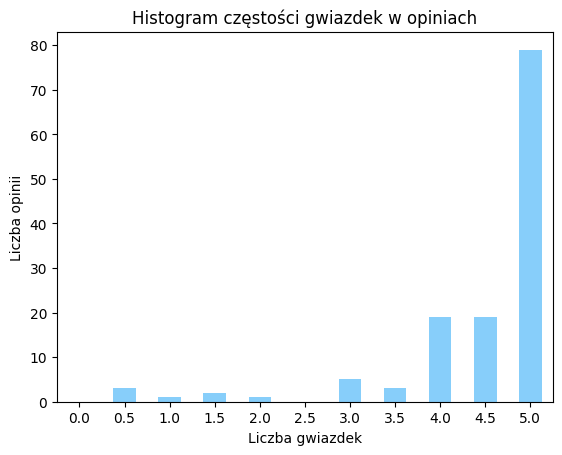

In [65]:
stars_distribution.plot.bar(color="lightskyblue")
plt.title("Histogram częstości gwiazdek w opiniach")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)

## Udział poszczególnych rekomendacji w ogólnej liczbie opinii

In [66]:
recommendations_distribution = opinions.recommendation.value_counts(dropna=False)
recommendations_distribution

recommendation
Polecam        114
None            11
Nie polecam      7
Name: count, dtype: int64

TypeError: Axes.pie() got an unexpected keyword argument 'autopact'

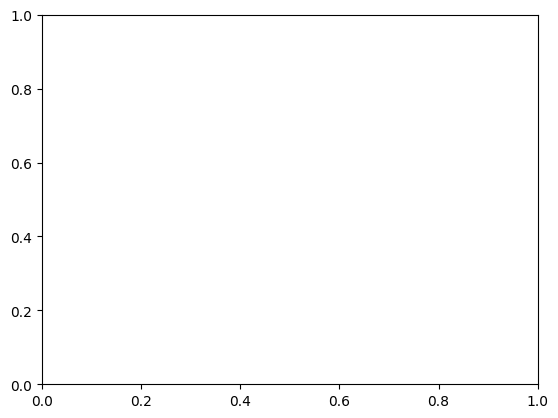

In [67]:
recommendations_distribution.plot.pie(
    colors = ["forestgreen", "gold", "crimson"],
    label = "",
    autopct = "%1.1f%%",
)
plt.title("Udział rekomendacji w opiniach")